<a href="https://colab.research.google.com/github/Blutronics/OffensiveTwitterDetection/blob/Toan/OffensiveDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [644]:
import numpy as np
import pandas as pd
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,r2_score
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
#!pip install bayesian-optimization
#! pip install scikit-optimize
#!pip install shap
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
import time
import sys
from sklearn.metrics import roc_auc_score, roc_curve
import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [645]:
data=pd.read_csv("twitter.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [646]:
classdf=data[['class','tweet']]
classdf.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [647]:
tweets=classdf.tweet.to_string()

In [648]:
tweets = re.sub("[^A-Za-z" "]+"," ", tweets).lower()
tweets = re.sub("[0-9" "]+"," ", tweets)

In [649]:
class2df=classdf.loc[classdf['class']==2]
class2df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [650]:
offensivedf=classdf.loc[classdf['class']==1]
offensivedf.head()

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [651]:
hatedf=classdf.loc[classdf['class']==0]
hatedf.head()

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [652]:
offensivetweets=offensivedf.tweet.to_string()


In [653]:
offensivetweets = re.sub("[^A-Za-z" "]+"," ", offensivetweets).lower()
offensivetweets = re.sub("[0-9" "]+"," ", offensivetweets)

In [654]:
offensivetweets = offensivetweets.split(" ")
#offensivetweets

In [655]:
hatespeachtweets=hatedf.tweet.to_string()


In [656]:
hatespeachtweets = re.sub("[^A-Za-z" "]+"," ", hatespeachtweets).lower()
hatespeachtweets = re.sub("[0-9" "]+"," ", hatespeachtweets)

In [657]:
hatespeachtweets = hatespeachtweets.split(" ")

In [658]:
#hatespeachtweets

In [659]:
vectorizer = TfidfVectorizer()
offensive = vectorizer.fit_transform(offensivetweets)

In [660]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

In [661]:
stop_words = stop_words.split("\n")

In [662]:
stop_words.extend(["rt","a"])

In [663]:
offensivetweets = [w for w in offensivetweets if not w in stop_words]


In [664]:
offensivetweets = " ".join(offensivetweets)

In [665]:

wordcloud_offensive = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(offensivetweets)

In [666]:
#offensivetweets

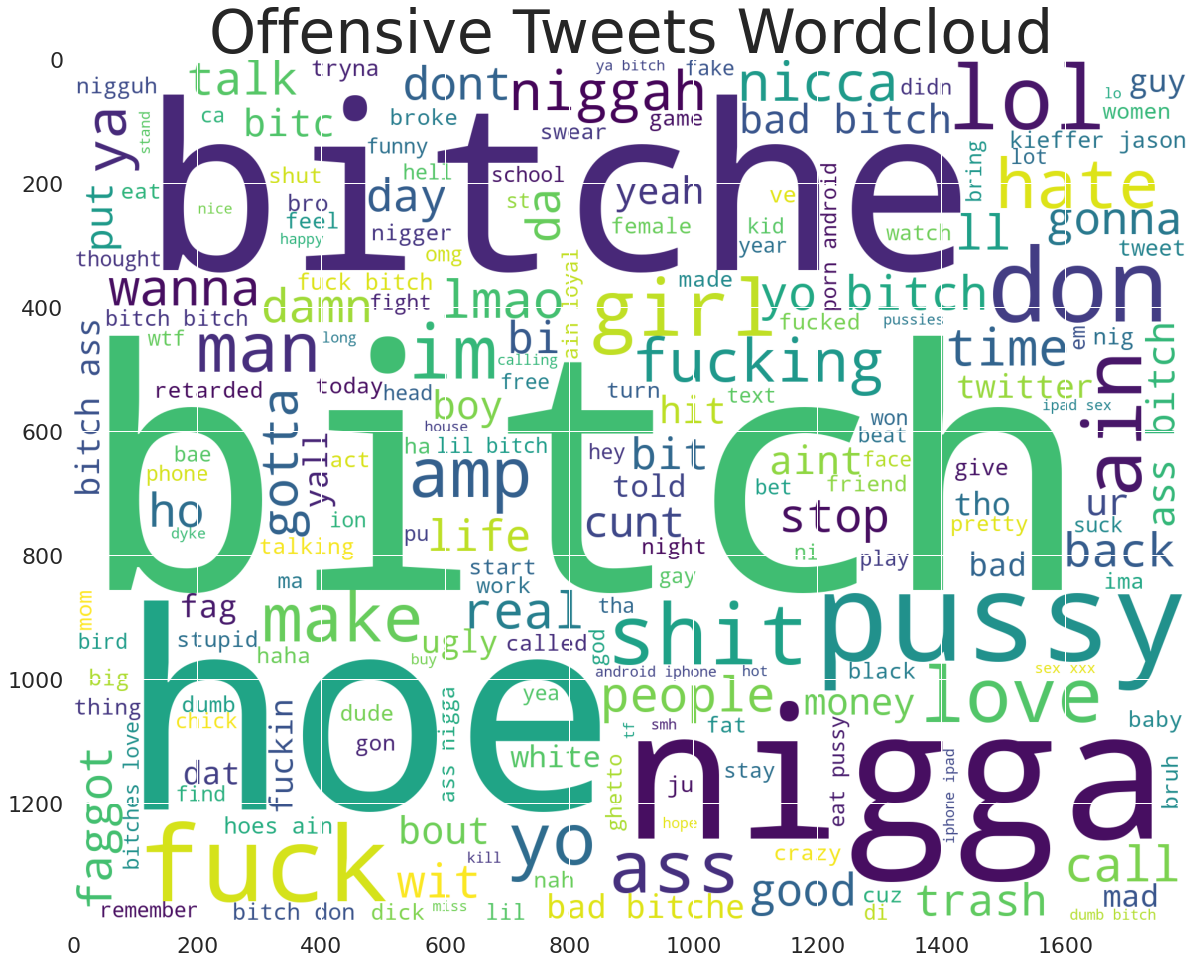

In [667]:
plt.figure(figsize=(20,20))
plt.title("Offensive Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_offensive)

In [668]:
offensivetweets = offensivetweets.split(" ")

In [669]:
letter_counts = Counter(offensivetweets)
letter_counts.pop('')


1

In [670]:
most_offensive = letter_counts.most_common(30)
most_offensive

[('bitch', 4601),
 ('bitches', 1784),
 ('hoes', 1377),
 ('pussy', 1059),
 ('hoe', 1027),
 ('don', 714),
 ('fuck', 696),
 ('ass', 619),
 ('nigga', 524),
 ('ain', 505),
 ('shit', 440),
 ('niggas', 418),
 ('lol', 407),
 ('yo', 406),
 ('love', 364),
 ('bad', 347),
 ('http', 298),
 ('im', 282),
 ('hate', 282),
 ('ya', 240),
 ('fucking', 236),
 ('amp', 231),
 ('man', 222),
 ('good', 206),
 ('real', 204),
 ('make', 197),
 ('girl', 197),
 ('niggah', 178),
 ('wit', 176),
 ('wanna', 173)]

In [671]:
offensivefreqs=list([i[1] for i in most_offensive])
offensivewords=list([i[0] for i in most_offensive])
offensivefreqs[0:30]

[4601,
 1784,
 1377,
 1059,
 1027,
 714,
 696,
 619,
 524,
 505,
 440,
 418,
 407,
 406,
 364,
 347,
 298,
 282,
 282,
 240,
 236,
 231,
 222,
 206,
 204,
 197,
 197,
 178,
 176,
 173]

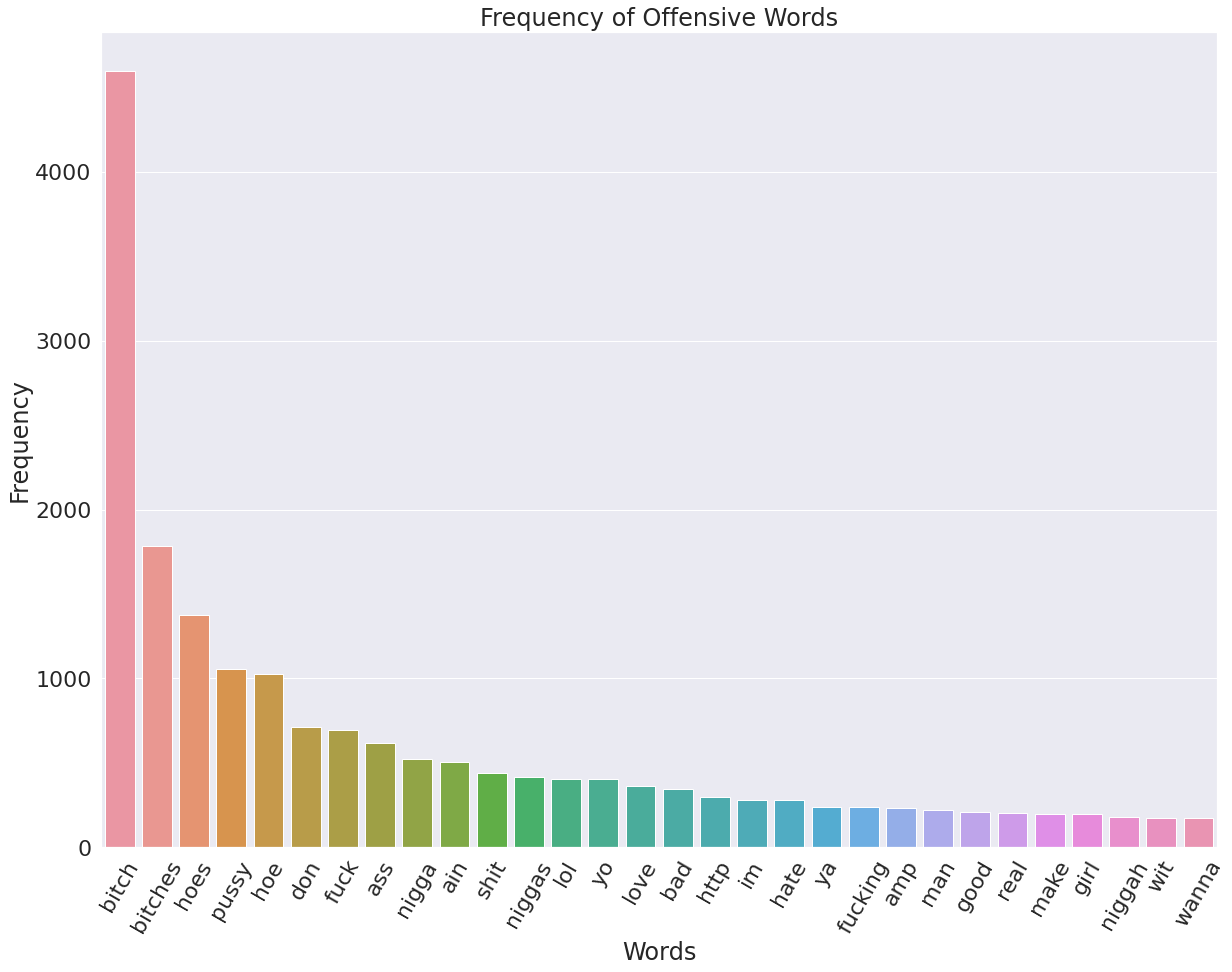

In [672]:
sns.set(rc = {'figure.figsize':(20,15)}, font_scale = 2)
sns.barplot(offensivewords[0:30],offensivefreqs[0:30])
plt.title("Frequency of Offensive Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
# sns.set(font_scale = 2)
sns.set_palette("Paired", 30)
plt.xticks(list(range(0, 30), ), offensivewords[0:30],rotation=60)
plt.show()

In [673]:
hatespeachtweets = [w for w in hatespeachtweets if not w in stop_words]

In [674]:
hatespeachtweets = " ".join(hatespeachtweets)

In [675]:
wordcloud_hate = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(hatespeachtweets)

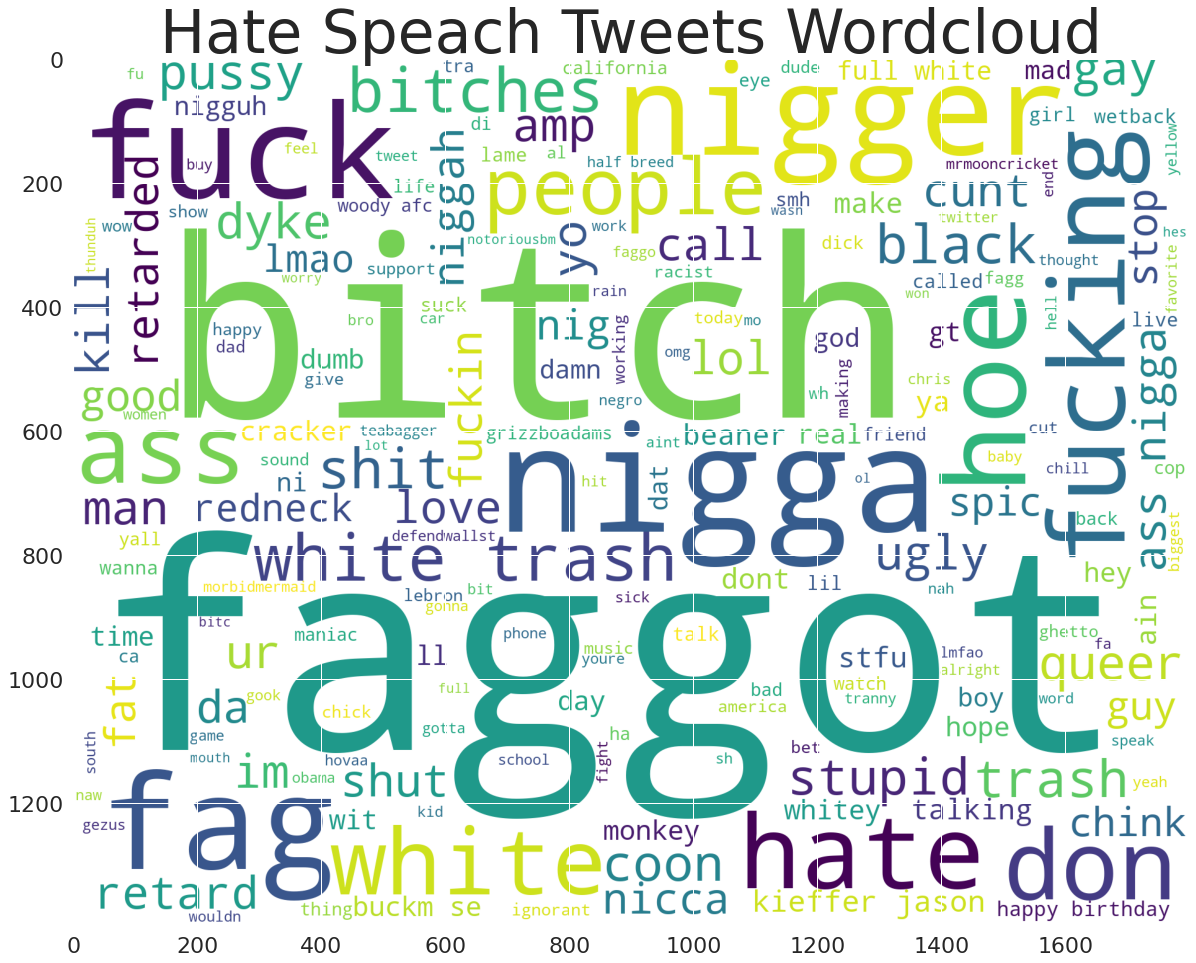

In [676]:
plt.figure(figsize=(20,20))
plt.title("Hate Speach Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_hate)


In [677]:
offensivetweets = " ".join(offensivetweets)

In [678]:
both=offensivetweets+hatespeachtweets
#both

In [679]:
wordcloud_both = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(both)

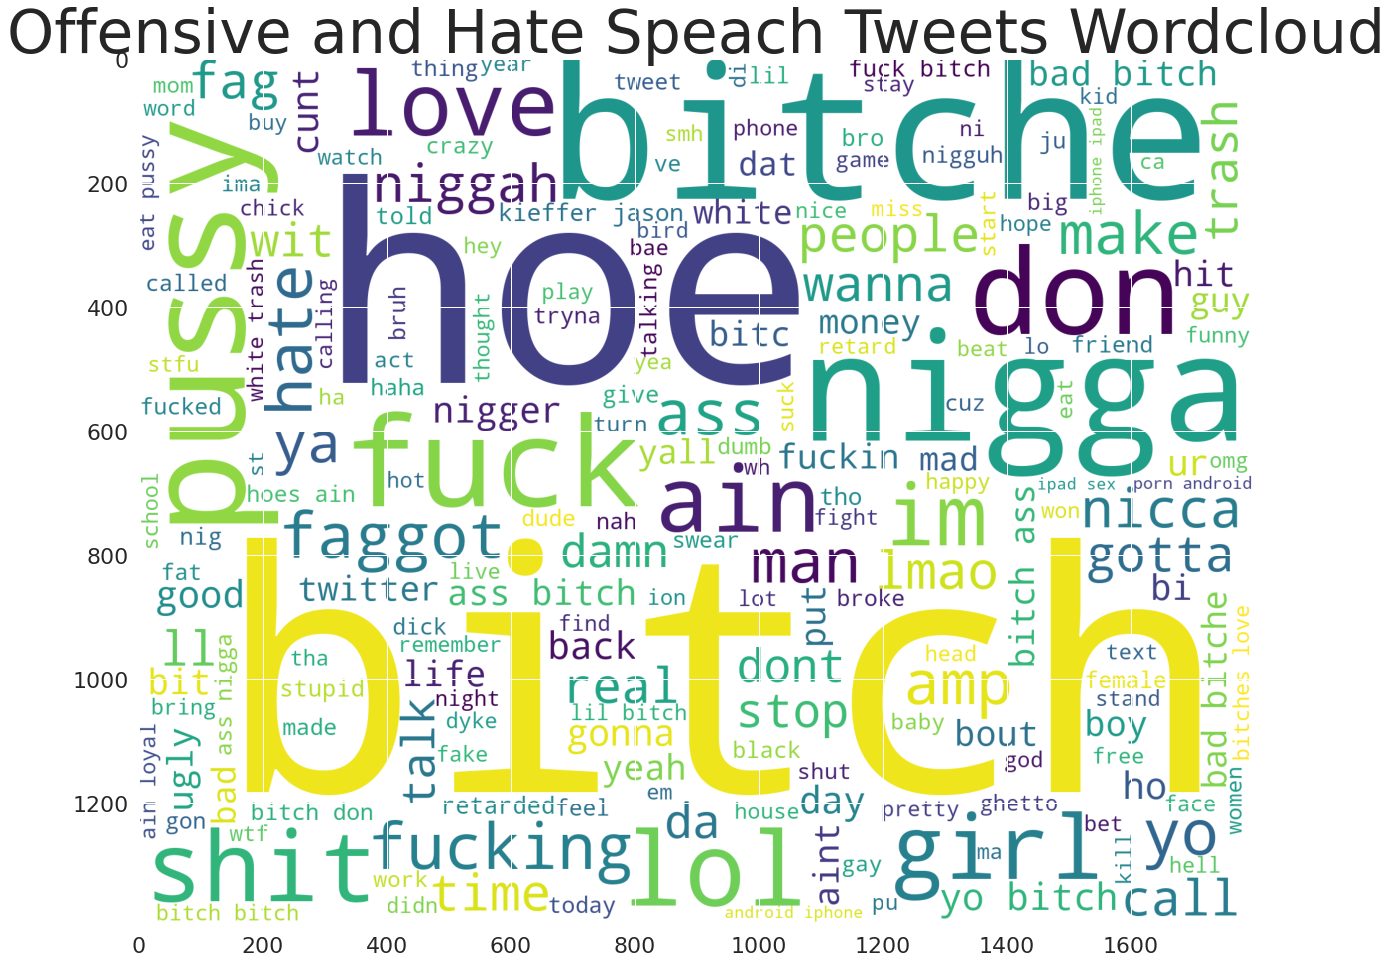

In [680]:
plt.figure(figsize=(20,20))
plt.title("Offensive and Hate Speach Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_both)

In [681]:
hatespeachtweets = hatespeachtweets.split(" ")

In [682]:
letter_counts2 = Counter(hatespeachtweets)
letter_counts2.pop('')

2

In [683]:
most_hate = letter_counts2.most_common(30)
most_hate

[('faggot', 102),
 ('bitch', 98),
 ('white', 75),
 ('fuck', 73),
 ('nigga', 60),
 ('ass', 54),
 ('trash', 54),
 ('fag', 51),
 ('niggas', 50),
 ('nigger', 48),
 ('fucking', 46),
 ('hate', 43),
 ('don', 39),
 ('people', 34),
 ('faggots', 31),
 ('bitches', 30),
 ('hoes', 29),
 ('http', 28),
 ('hoe', 25),
 ('shit', 23),
 ('fags', 22),
 ('black', 21),
 ('niggers', 20),
 ('stupid', 20),
 ('pussy', 19),
 ('man', 18),
 ('ugly', 18),
 ('yo', 18),
 ('gay', 17),
 ('kill', 17)]

In [684]:
hatefreqs=list([i[1] for i in most_hate])
hatewords=list([i[0] for i in most_hate])
hatefreqs[0:30]

[102,
 98,
 75,
 73,
 60,
 54,
 54,
 51,
 50,
 48,
 46,
 43,
 39,
 34,
 31,
 30,
 29,
 28,
 25,
 23,
 22,
 21,
 20,
 20,
 19,
 18,
 18,
 18,
 17,
 17]

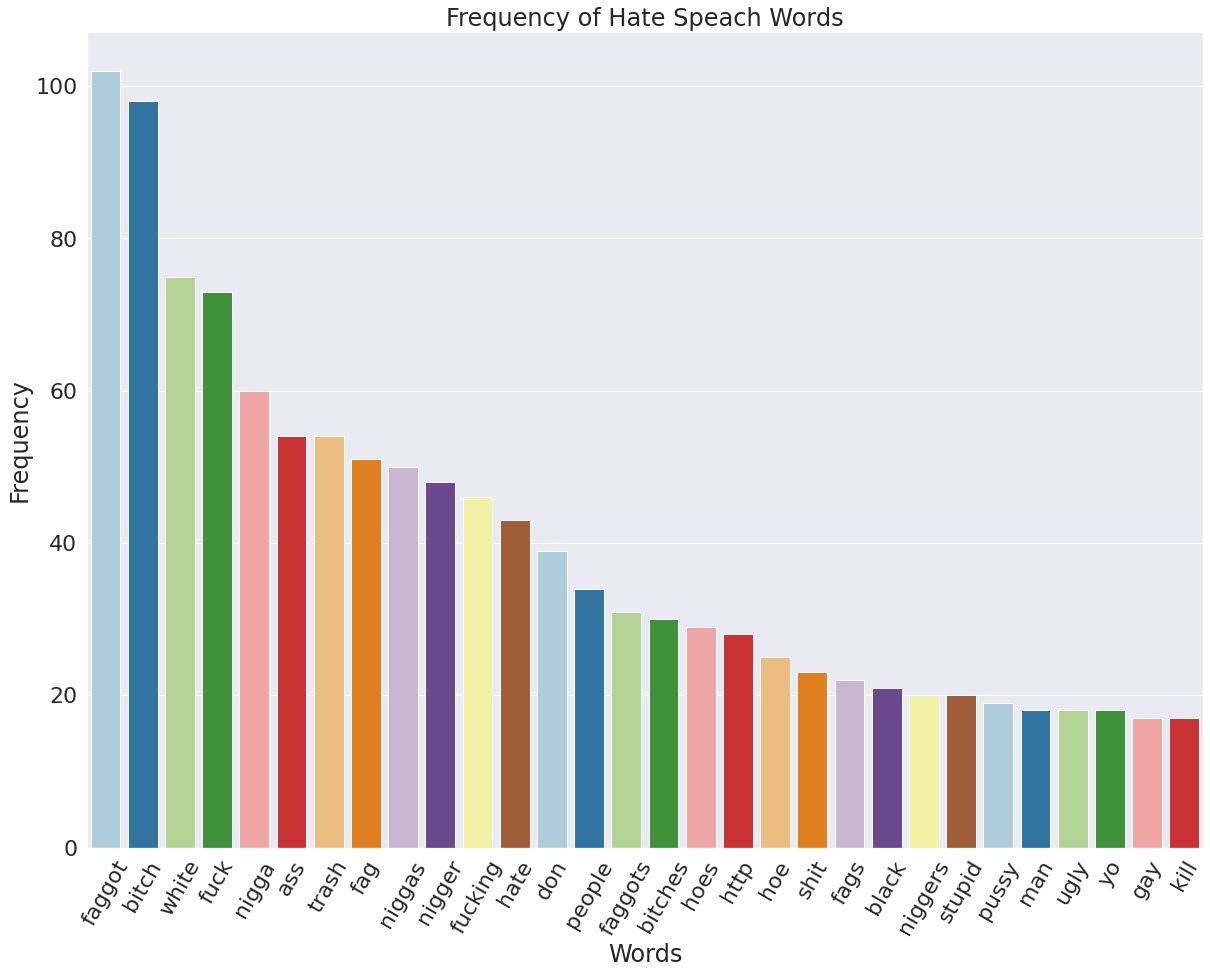

In [685]:
sns.barplot(hatewords[0:30],hatefreqs[0:30])
plt.title("Frequency of Hate Speach Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(20,15)}, font_scale = 2)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 30)
plt.xticks(list(range(0, 30), ), hatewords[0:30],rotation=60)
plt.show()

In [686]:
def countOccurrences(str, word, listword):
     
    # split the string by spaces in a
    a = str.split(" ")
    # search for pattern in a
    count = 0
    # for i in range(1000):
    for i in range(0, len(a)):
        
        # if match found increase count
        # print(a[i])
      if (word == a[i]):
          count = count + 1
    if count > 0:
      listword.append(1)
    else:
      listword.append(0)
            
    return count, listword

In [687]:
bitch = []
# for i in range(12):
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)
  

In [688]:
bitches = []
# for i in range(12):
for i in range(24783):
  count, bitches = countOccurrences(classdf.tweet[i],"bitches", bitches)
  

In [689]:
hoes = []
# for i in range(12):
for i in range(24783):
  count, hoes = countOccurrences(classdf.tweet[i],"hoes", hoes)
  

In [690]:
pussy = []
# for i in range(12):
for i in range(24783):
  count, pussy = countOccurrences(classdf.tweet[i],"pussy", pussy)
  

In [691]:
hoe = []
# for i in range(12):
for i in range(24783):
  count, hoe = countOccurrences(classdf.tweet[i],"hoe", hoe)
  

In [692]:
fuck = []
# for i in range(12):
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)
  

In [693]:
ass = []
# for i in range(12):
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [694]:
niggah = []
# for i in range(12):
for i in range(24783):
  count, niggah = countOccurrences(classdf.tweet[i],"niggah", niggah)

In [695]:
nigga = []
# for i in range(12):
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [696]:
shit = []
# for i in range(12):
for i in range(24783):
  count, shit = countOccurrences(classdf.tweet[i],"shit", shit)

In [697]:
niggas = []
# for i in range(12):
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [698]:
nigger = []
# for i in range(12):
for i in range(24783):
  count, nigger = countOccurrences(classdf.tweet[i],"nigger", nigger)

In [699]:
gay = []
# for i in range(12):
for i in range(24783):
  count, gay = countOccurrences(classdf.tweet[i],"gay", gay)

In [700]:
ugly = []
# for i in range(12):
for i in range(24783):
  count, ugly = countOccurrences(classdf.tweet[i],"ugly", ugly)

In [701]:
#create a new dataframe counting each frequent word for each tweet(row)
#most frequent word= column

In [702]:
encodedDf = pd.DataFrame(bitch)

In [703]:
encodedDf

,0
0,0
1,0
2,1
3,0
4,1
...,...
24778,0
24779,0
24780,0
24781,0


In [704]:
encodedDf.rename(columns = {0:"Bitch"},inplace=True)

In [705]:
encodedDf["Bitches"] = bitches

In [706]:
encodedDf["Hoes"] = hoes

In [707]:
encodedDf["Pussy"] = pussy

In [708]:
encodedDf["Hoe"] = hoe

In [709]:
encodedDf["Fuck"] = fuck

In [710]:
encodedDf["Ass"] = ass

In [711]:
encodedDf["Nigga"] = nigga

In [712]:
encodedDf["Shit"] = shit

In [713]:
encodedDf["Niggas"] = niggas

In [714]:
encodedDf["Nigger"] = nigger

In [715]:
#encodedDf["Niggah"] = niggah

In [716]:
encodedDf["Gay"] = gay

In [717]:
encodedDf["Ugly"] = ugly

In [718]:
encodedDf

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,Nigger,Gay,Ugly
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0,0,0,0
24781,0,1,0,0,0,0,0,0,0,0,0,0,0


In [719]:
faggot = []
for i in range(24783):
  count, faggot = countOccurrences(classdf.tweet[i],"faggot", faggot)
  

In [720]:
bitch = []
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)

In [721]:
fuck = []
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)

In [722]:
nigga = []
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [723]:
ass = []
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [724]:
fag = []
for i in range(24783):
  count, fag = countOccurrences(classdf.tweet[i],"fag", fag)

In [725]:
niggas = []
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [726]:
fucking = []
for i in range(24783):
  count, fucking = countOccurrences(classdf.tweet[i],"fucking", fucking)

In [727]:
faggots = []
for i in range(24783):
  count, faggots = countOccurrences(classdf.tweet[i],"faggots", faggots)

In [728]:
white = []
for i in range(24783):
  count, white = countOccurrences(classdf.tweet[i],"white", white)

In [729]:
trash = []
for i in range(24783):
  count, trash = countOccurrences(classdf.tweet[i],"trash", trash)

In [730]:
love = []
for i in range(24783):
  count, love = countOccurrences(classdf.tweet[i],"love", love)

In [731]:
real = []
for i in range(24783):
  count, real = countOccurrences(classdf.tweet[i],"real", real)

In [732]:
good = []
for i in range(24783):
  count, good = countOccurrences(classdf.tweet[i],"good", good)

In [733]:
black = []
for i in range(24783):
  count, black = countOccurrences(classdf.tweet[i],"black", black)

In [734]:

encodedHateDF = pd.DataFrame(faggot)

In [735]:
encodedHateDF

,0
0,0
1,0
2,0
3,0
4,0
...,...
24778,0
24779,0
24780,0
24781,0


In [736]:
encodedHateDF.rename(columns = {0: "Faggot"}, inplace = True)

In [737]:
#encodedHateDF["Bitch"] = bitch

In [738]:
#encodedHateDF["Fuck"] = fuck

In [739]:
#encodedHateDF["Nigga"] = nigga

In [740]:
#encodedHateDF["Ass"] = ass

In [741]:
encodedHateDF["Fag"] = fag

In [742]:
#encodedHateDF["Niggas"] = niggas

In [743]:
encodedHateDF["Fucking"] = fucking

In [744]:
encodedHateDF["Faggots"] = faggots

In [745]:
encodedHateDF["White"] = white

In [746]:
encodedHateDF["Trash"] = trash

In [747]:
encodedHateDF["Love"] = love

In [748]:
encodedHateDF["Real"] = real

In [749]:
encodedHateDF["Good"] = good

In [750]:
encodedHateDF["Black"] = black

In [751]:
encodedHateDF

,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,1,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0
24781,0,0,0,0,0,0,0,0,0,0


In [752]:
wordDF = pd.merge(encodedDf, encodedHateDF, left_index=True, right_index=True)

In [753]:
wordDF.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [754]:
target = classdf["class"]

In [755]:
sm = SMOTE()
X,Y = sm.fit_resample(wordDF,target)

In [756]:
x_train,x_test,x_target_train,x_target_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=14)

In [757]:
#rfc=RandomForestClassifier(n_estimators= 250, max_depth=100)
#dtc=DecisionTreeClassifier()
#lr=LogisticRegression(max_iter=600)
#knnc=KNeighborsClassifier()
#svc=SVC()
#nb=GaussianNB()

In [758]:
#models = [("rfc",rfc),("dtc",dtc),("lr",lr),("knnc",knnc),("svc",svc),("nb",nb)]

In [759]:
#voting = VotingClassifier(models)

In [760]:
#voting.fit(x_train,x_target_train)

In [761]:
#x_pred = voting.predict(x_test)

In [762]:
#accuracy_score(x_target_test,x_pred)

In [763]:
#model = xgb.XGBClassifier()
#model.fit(x_train,x_target_train)

In [764]:
#x_pred = model.predict(x_test)

In [765]:
#accuracy_score(x_target_test,x_pred)

In [766]:
model = lgb.LGBMClassifier()

In [767]:
model.fit(x_train,x_target_train)

LGBMClassifier()

In [768]:
x_pred = model.predict(x_test)
accuracy_score(x_target_test,x_pred)

0.7028834462393608

In [769]:
x_test

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
24133,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12631,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [770]:
example="fuck"

In [771]:
user_inp_df={}
for i in wordDF.columns:
  word=[]
  count,word=countOccurrences(example,i.lower(),word)
  user_inp_df[i]=word
  #print(word)

user_inp_df

{'Ass': [0],
 'Bitch': [0],
 'Bitches': [0],
 'Black': [0],
 'Fag': [0],
 'Faggot': [0],
 'Faggots': [0],
 'Fuck': [1],
 'Fucking': [0],
 'Gay': [0],
 'Good': [0],
 'Hoe': [0],
 'Hoes': [0],
 'Love': [0],
 'Nigga': [0],
 'Niggas': [0],
 'Nigger': [0],
 'Pussy': [0],
 'Real': [0],
 'Shit': [0],
 'Trash': [0],
 'Ugly': [0],
 'White': [0]}

In [772]:
new_user_df=pd.DataFrame.from_dict(user_inp_df)
new_user_df.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [773]:
prediction=model.predict(new_user_df)

In [774]:
prediction

array([0])

In [775]:
rs_params = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)
}

In [776]:
#rs_cv = RandomizedSearchCV(estimator=gbm.LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

In [777]:
#rs_cv.fit(x_train,x_target_train,verbose=1)

In [778]:
#rs_cv.best_params_

In [779]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [780]:
x_train

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
7462,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
14827,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35747,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32153,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22855,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13656,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [781]:
X = reduce_mem_usage(x_train)
y = x_target_train

Mem. usage decreased to  1.36 Mb (83.9% reduction)


In [782]:
#model = gbm.LGBMClassifier(**rs_cv.best_params_)

In [783]:
#model.fit(x_train,x_target_train)

In [784]:
#x_pred = model.predict(x_test)
#accuracy_score(x_target_test,x_pred)

In [785]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=14,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 100),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 40),
                                            'max_bin':(20,100),
                                            'min_data_in_leaf': (20, 100),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=12, opt_round=50, n_folds=3, random_seed=14,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7502   |  0.9895   |  0.2812   |  0.5985   |  54.26    |  31.74    |  20.23    |  35.74    |  93.14    |  0.4615   |
|  2        |  0.7617   |  0.9964   |  0.7939   |  0.9862   |  93.86    |  15.63    |  87.69    |  12.12    |  83.7     |  0.258    |
|  3        |  0.7554   |  0.8192   |  0.8548   |  0.8278   |  61.47    |  35.57    |  66.27    |  45.01    |  75.69    |  0.4252   |
|  4        |  0.7498   |  0.9281   |  0.5869   |  0.1144   |  97.28    |  31.55    |  74.37    |  32.93    |  26.01    |  0.8056   |
|  5        |  0.7375   |  0.9946   |  0.3264   |  0.6526   |  41.25    |  11.57    |  53.52    |  66.6     |  63.32    |  0.8559   |
|  6        |  0.7279   |  0.8342   |  0.8825   |  0.3083   | 

In [786]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
#opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9379277522263378,
 'boost_from_average': False,
 'feature_fraction': 0.9,
 'is_unbalance': True,
 'learning_rate': 1.0,
 'max_bin': 20,
 'max_depth': 30,
 'min_data_in_leaf': 71,
 'min_sum_hessian_in_leaf': 0.0,
 'num_leaves': 70,
 'objective': 'binary',
 'subsample': 1.0}

In [791]:
opt_params = {'bagging_fraction': 0.9379277522263378,
 'boost_from_average': False,
 'feature_fraction': 0.9,
 'is_unbalance': True,
 'learning_rate': 1.0,
 'max_bin': 20,
 'max_depth': 30,
 'min_data_in_leaf': 71,
 'min_sum_hessian_in_leaf': 0.0,
 'num_leaves': 70,
 'objective': 'binary',
 'subsample': 1.0}

 model = lgb.LGBMClassifier(**opt_params)

In [788]:
model = lgb.LGBMClassifier(**opt_params)

In [789]:
model.fit(x_train,x_target_train)

LGBMClassifier(bagging_fraction=0.9379277522263378, boost_from_average=False,
               feature_fraction=0.9, is_unbalance=True, learning_rate=1.0,
               max_bin=20, max_depth=30, min_data_in_leaf=71,
               min_sum_hessian_in_leaf=0.0, num_leaves=70, objective='binary')

In [790]:
x_pred = model.predict(x_test)
accuracy_score(x_target_test,x_pred)

0.7042730588848358